**Importando Bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Definindo a semente para reprodução
np.random.seed(42)
random.seed(42)

<hr style="height:3px;border-width:0;color:blue;background-color:blue">

Eu pretendo criar um dataset que contenha **encontros aleatórios de alguns monstros** e que de alguma forma isso reflita nas vendas da base de dados original.

Eu escolhi arbitrariamente apenas monstros do universo de *Dungeons and Dragon*, e para eles eu escolhi animais da vida real para inspirar suas aparições aleatória neste dataset.

**Os montros e animais escolhidos foram:** 
* Owlbear -----> Coruja Jacurutu
* Dragão -----> Dragão de Komodo
* Griffon -----> Harpia (Gavião Real)

Os períodos serão escolhidos aleatóriamente nos seguintes intervalos por animais:

| monstro | início |  fim  | quantidade (por ano) | 
| --------| -----  | ----- | -------------------- |
| Owbear  | 21/06  | 23/09 | 28 - 35              |
| Dragão  | 01/05  | 01/09 | 12                   |
| Griffon | 01/06  | 01/11 | 56                   |


A quantidade do **Owlbear** foi baseado no tempo de incubação das ***Jacurutu***;

A quantidade do **Dragão** foi inspirado na quantidade de refeições que os ***Dragões de Komodo*** conseguem sobreviver por ano;

A quantidade do **Griffon** foi inspirada no tempo de incubação das ***Harpias*** (Elas podem ter apenas 1 filho a cada 2 anos).

**O Dataset vai ter a seguinte estrutura:**

| encounter_id | date | monster | encounter_type| 
| ------------ | -----| ------- | --------------|
| ------------ | -----| ------- | --------------|
| ------------ | -----| ------- | --------------|

Criando o range de datas similar à tabela de vendas:

In [2]:
data_inicial = datetime(2017, 1, 1)
data_final = datetime(2023, 12, 31)
intervalo_datas = [data_inicial + timedelta(days=i) for i in range((data_final - data_inicial).days + 1)]

## **Criando o período de aparições para cada monstro:**

### **Owlbear**

In [3]:
# criando uma lista que salva períodos de tempo
owlbear_date_range = []
for i in range(17, 24):
    owlbear_date_range.append(pd.date_range(start=f'06/21/20{i}', end=f'09/23/20{i}'))

In [4]:
# tranforma as lista em uma lista única
owlbear_period = []
for range_set in owlbear_date_range:
    owlbear_period.extend(range_set)

In [5]:
# tranformando em Series
owlbear_period = pd.Series(owlbear_period)


In [6]:
owlbear_period

0     2017-06-21
1     2017-06-22
2     2017-06-23
3     2017-06-24
4     2017-06-25
         ...    
660   2023-09-19
661   2023-09-20
662   2023-09-21
663   2023-09-22
664   2023-09-23
Length: 665, dtype: datetime64[ns]

### **Dragão**

In [13]:
# criando uma lista que salva períodos de tempo
dragon_date_range = []
for i in range(17, 24):
    dragon_date_range.append(pd.date_range(start=f'05/01/20{i}', end=f'09/01/20{i}'))

In [14]:
# tranforma as lista em uma lista única
dragon_period = []
for range_set in dragon_date_range:
    dragon_period.extend(range_set)

In [15]:
# tranformando em Series
dragon_period = pd.Series(dragon_period)
dragon_period  

0     2017-05-01
1     2017-05-02
2     2017-05-03
3     2017-05-04
4     2017-05-05
         ...    
863   2023-08-28
864   2023-08-29
865   2023-08-30
866   2023-08-31
867   2023-09-01
Length: 868, dtype: datetime64[ns]

<hr style="height:3px;border-width:0;color:blue;background-color:blue">

### **Griffon**

In [16]:
# criando uma lista que salva períodos de tempo
griffon_date_range = []
for i in range(17, 24):
    griffon_date_range.append(pd.date_range(start=f'06/01/20{i}', end=f'11/01/20{i}'))

# tranforma as lista em uma lista única
griffon_period = []
for range_set in griffon_date_range:
    griffon_period.extend(range_set)

# tranformando em Series
griffon_period = pd.Series(griffon_period) 

In [17]:
griffon_period

0      2017-06-01
1      2017-06-02
2      2017-06-03
3      2017-06-04
4      2017-06-05
          ...    
1073   2023-10-28
1074   2023-10-29
1075   2023-10-30
1076   2023-10-31
1077   2023-11-01
Length: 1078, dtype: datetime64[ns]

<hr style="height:3px;border-width:0;color:blue;background-color:blue">

## **Criando o Dataset de encontros aleatórios:**

Vão haver apenas dois tipos de encontros: ***'avistamentos'*** e ***'combate'***

In [18]:
encounters_type = ['combat', 'sighting']

In [19]:
import time
import string

In [30]:
# criando função para gerar IDs
def generate_encounter_id(i):
    """Function to generate random encounter_IDs.
    
    This will return a random string with length = 9 chars"""
    timestamp = str(int(time.time_ns()) + i)
    random_chars = ''.join(random.choices(string.ascii_uppercase + string.digits, k=4))
    return f"{timestamp[15:]}-{random_chars}"   # return new unique ID

In [37]:
print("Exemplo de Id gerado: ", generate_encounter_id(1))

Exemplo de Id gerado:  8501-T9NT


In [69]:
num_encounters_owlbear = random.randint(28, 35) * ( 2023 - 2017 ) # encontros por ano multiplicado pela quantidade de anos 
                                                                  #  na tabela de vendas 
num_encounters_owlbear

186

In [71]:
num_encounters_dragon = 12 * ( 2023 - 2017 ) # encontros por ano multiplicado pela quantidade de anos 
                                             #  na tabela de vendas 
num_encounters_dragon

72

In [73]:
num_encounters_griffon = 56 * ( 2023 - 2017 ) # encontros por ano multiplicado pela quantidade de anos 
                                              #  na tabela de vendas 
num_encounters_griffon

336

In [88]:
# criando a tabela de encontros apenas com o monstro "Owlbear"
encounters = {
    'date': [random.choice(list(owlbear_period)) for _ in range(num_encounters_owlbear)],
    'monster' : 'owlbear',
    'encounter_type': [random.choice(encounters_type) for _ in range(num_encounters_owlbear)]
}

# transformando em dataframe
encounters = pd.DataFrame(encounters)

In [96]:
# criando a tabela de encontros apenas com o monstro "Dragon"
dragon_encouters = pd.DataFrame({
              'date': [random.choice(list(dragon_period)) for _ in range(num_encounters_dragon)],
              'monster' : 'dragon',
              'encounter_type': [random.choice(encounters_type) for _ in range(num_encounters_dragon)]
          })

In [97]:
# criando a tabela de encontros apenas com o monstro "Griffon"
griffon_encouters = pd.DataFrame({
              'date': [random.choice(list(griffon_period)) for _ in range(num_encounters_griffon)],
              'monster' : 'griffon',
              'encounter_type': [random.choice(encounters_type) for _ in range(num_encounters_griffon)]
          })

In [105]:
# concatenando todas tabelas em apenas uma
encounters = pd.concat([encounters, dragon_encouters, griffon_encouters])

In [112]:
# gerando os IDs
encounters['enc_id'] = [generate_encounter_id(i) for i in range(len(encounters))]

In [124]:
# realocando a coluna "enc_id" e resetando os índices
encounters = encounters[['enc_id'] + [col for col in encounters.columns if col != 'enc_id']]
encounters.reset_index(drop=True, inplace=True)

In [138]:
encounters

,enc_id,date,monster,encounter_type
0,7900-C4E5,2021-09-10,owlbear,combat
1,7901-HRDU,2019-08-19,owlbear,combat
2,7902-4XSZ,2022-06-21,owlbear,sighting
3,7903-JNVC,2023-07-04,owlbear,sighting
4,7904-7HR6,2023-08-14,owlbear,sighting
...,...,...,...,...
589,2189-3BDW,2019-10-09,griffon,sighting
590,2190-56FK,2019-09-14,griffon,combat
591,2191-PS0D,2020-09-02,griffon,sighting
592,2192-XME4,2020-09-03,griffon,sighting


<Axes: xlabel='monster'>

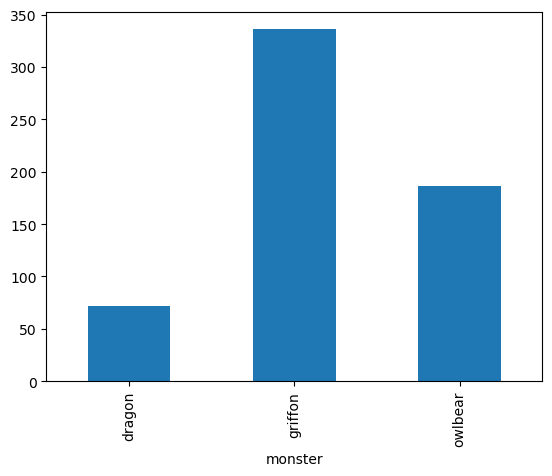

In [137]:
encounters.groupby('monster')['enc_id'].count().plot(kind='bar')

## **Exportando tabela:**

In [139]:
encounters.to_csv('data/encounters.csv', index=False)

Agora resta usar esses dados para alterar a tabela de vendas original.

**FIM.**